In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import json
from datetime import datetime

In [2]:
df = pd.read_csv("../data/hr_neighbors.csv")

print "total number of lines =", len(df)

df_clean = df[(df.numTxPackets > 0) & (df.numTxFailures >= 0) & (df.rssi<0)].drop_duplicates(["time","mac"])

df_clean.loc[:,'pdr'] = pd.Series((df_clean.numTxPackets-df_clean.numTxFailures)/df_clean.numTxPackets, index=df_clean.index)

lines_removed = len(df) - len(df_clean)

print "number of lines left = ", len(df_clean), "(", round(float(len(df_clean))*100/len(df), 2), "% )"
print "number of lines removed = ", lines_removed, "(", round(float(lines_removed)*100/len(df), 2), "% )"

df_clean.head()

total number of lines = 447211
number of lines left =  144187 ( 32.24 % )
number of lines removed =  303024 ( 67.76 % )


,time,mac,neighborMac,neighborFlag,rssi,numTxPackets,numTxFailures,numRxPackets,mote_board,ngbr_board,distance,pdr
1,1478080852,00-17-0d-00-00-38-00-63,NaN,0,-63,129,4,2,NaN,NaN,0.0,0.968992
4,1478081752,00-17-0d-00-00-38-00-63,NaN,0,-65,131,13,2,NaN,NaN,0.0,0.900763
7,1478082651,00-17-0d-00-00-38-00-63,NaN,0,-63,128,4,0,NaN,NaN,0.0,0.968750
10,1478083551,00-17-0d-00-00-38-00-63,00-17-0d-00-00-60-47-b6,0,-63,122,8,2,huron,NaN,0.0,0.934426
13,1478084451,00-17-0d-00-00-38-00-63,00-17-0d-00-00-60-47-b6,0,-63,128,2,2,huron,NaN,0.0,0.984375


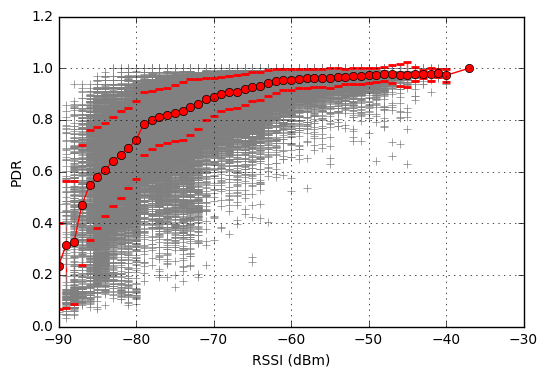

In [3]:
df_indexed = df_clean.set_index(df_clean["rssi"])

df_grouped = df_indexed.groupby(["rssi"])

mean_index = [name for name, group in df_grouped]
mean_pdr   = [group.pdr.mean() for name, group in df_grouped]
std_pdr    = [group.pdr.std() for name, group in df_grouped]

plt.plot(df_indexed.rssi, df_indexed.pdr, '+', color='grey')
plt.errorbar(mean_index, mean_pdr, std_pdr, fmt='-o', color='red', capthick=2)

plt.xlabel('RSSI (dBm)')
plt.ylabel('PDR')

plt.grid(True)

plt.savefig("../figures/waterfall.eps", format='eps')
plt.show()